comparing knn regression and ols regression on 

data source:https://www.kaggle.com/blitzr/gfp2017/version/1
    

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
path = "/Users/jiahuiguo/Documents/GitHub/Thinkful/Thinkful_Practice/Bootcamp/Data/gfp2017/GlobalFirePower.csv"

df = pd.DataFrame(pd.read_csv(path))
df.head()

,Country,ISO3,Rank,Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,...,Railway Coverage (km),Serivecable Airports,Defense Budget,External Debt,Foreign Exchange / Gold,Purchasing Power Parity,Square Land Area (km),Coastline (km),Shared Borders (km),Waterways (km)
0,United States,USA,1,323995528,145215000,120025000,4220000,2363675,1373650,990025,...,224792,13513,587800,17910000,117600,18560000,9826675,19924,12048,41009
1,Russia,RUS,2,142355415,70000000,47000000,1355000,3371027,798527,2572500,...,87157,1218,44600,514800,365500,3745000,17098242,37653,22408,102000
2,China,CHN,3,1373541278,750000000,619000000,19550000,3712500,2260000,1452500,...,86000,507,161700,983500,3092000,21270000,9596961,14500,22457,110000
3,India,IND,4,1266883598,616000000,489600000,22900000,4207250,1362500,2844750,...,63974,346,51000,507000,359100,8721000,3287263,7000,13888,14500
4,France,FRA,5,66836154,30000000,23750000,775000,387635,204000,183635,...,29640,464,35000,5360000,138200,2737000,643801,4853,4072,8501


In [54]:
# choosing features and attributes 
list_to_use = ["Defense Budget","Total Population", "Shared Borders (km)", "Total Naval Assets", "Total Aircraft Strength", "Square Land Area (km)"]
df_use = df[list_to_use]
# target Budget
df_use.head()
# Features "Total Population", "Shared Borders(km)", "Total Naval Assets", "Total Aircraft Strength", "Square Land Area (km)", "Coastline (km)"

,Defense Budget,Total Population,Shared Borders (km),Total Naval Assets,Total Aircraft Strength,Square Land Area (km)
0,587800,323995528,12048,415,13762,9826675
1,44600,142355415,22408,352,3794,17098242
2,161700,1373541278,22457,714,2955,9596961
3,51000,1266883598,13888,295,2102,3287263
4,35000,66836154,4072,118,1305,643801


In [55]:
df_use["Defense Budget"].describe()

count       133.000000
mean      11553.827068
std       53323.041329
min          10.000000
25%         220.000000
50%        1870.000000
75%        6215.000000
max      587800.000000
Name: Defense Budget, dtype: float64

In [56]:
df_use = df_use.sort_values( "Total Population", ascending = False)
#drop top three populations
df_use = df_use.drop(df_use.index[0:3])

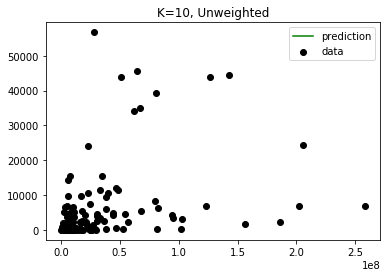

In [59]:
from sklearn import neighbors

#build model
knn = neighbors.KNeighborsRegressor(n_neighbors = 10)
Y = pd.DataFrame(df_use["Defense Budget"])
X = pd.DataFrame(df_use["Total Population"])
knn.fit(X, Y)

#set up prediction line
T = np.arange(10,600000,1000)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Unweighted Accuracy: -0.69 (+/- 1.23)


In [62]:
# ols model 
from sklearn import linear_model

lregr = linear_model.LinearRegression()
lregr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', lregr.coef_)
print('\nIntercept: \n', lregr.intercept_)
print('\nR-squared:')
print(lregr.score(X, Y))


Coefficients: 
 [[8.46823773e-05]]

Intercept: 
 [2949.99728651]

R-squared:
0.12782437349038123


In [63]:
score1 = cross_val_score(lregr, X, Y, cv=5)
print("Linear Model Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score.std() * 2))

Linear Model Accuracy: -0.75 (+/- 1.23)


The linear model and the knn model are both pretty horendous for this task. It is most likely due to the simplicity of the model, using only population size to predict defense spending. Maybe incorporating features such a per capita gdp, border size, recent conflicts, current military size would help to increase the accuracy of our models. 